In [3]:
import pandas as pd
import warnings 
from sklearn.preprocessing import StandardScaler


x= pd.read_excel('./data.xls')
x=x[x['User Name']=='nglkante']

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#x=x[x['User Name']=='edou_mendy']

In [6]:
def rm_bad_cols(x):
    x = x.dropna(thresh=x.shape[0]*0.5,how='all',axis=1)
    colsize = len(x.columns)
    i=0
    while (i < colsize):
        y=x.iloc[:,[i]]
        l=len(y[y[y.columns[0]] == 0])
        c=len(y[y[y.columns[0]] == '0'])
        #print(x.columns[i],l,len(x),l/len(x))
        if (l/(len(x))) > 0.6 or (c/(len(x))) > 0.6:
            x.__delitem__(y.columns[0])
            colsize = len(x.columns)
            i = i-1
        i = i+1
    return x

In [7]:
xx = rm_bad_cols(x)
xx['Beginning Of Interval'] = pd.to_datetime(xx['Beginning Of Interval'], format='%Y%m%d')

/Users/bobakhossainkhani/opt/anaconda3/envs/Data/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
def strip_no_numeric_cols(_df):
    cols = list(_df.select_dtypes(include=['object', 'string']).columns)
    _df = _df.drop(columns=cols)
    return _df

In [9]:
cleaned_xx = strip_no_numeric_cols(xx)
cleaned_xx

,Beginning Of Interval,Followers,Followers Growth
0,2020-01-05,6653215,0.0058
1,2020-01-12,6674227,0.0032
2,2020-01-19,6695382,0.0032
3,2020-01-26,6707574,0.0018
4,2020-02-02,6719138,0.0017
5,2020-02-09,6737460,0.0027
6,2020-02-16,6745849,0.0012
7,2020-02-23,6752960,0.0011
8,2020-03-01,6757554,0.0007
9,2020-03-08,6769050,0.0017


In [10]:
X = cleaned_xx['Beginning Of Interval']
Y1 = cleaned_xx['Followers Growth']
Y2 = cleaned_xx['Followers']

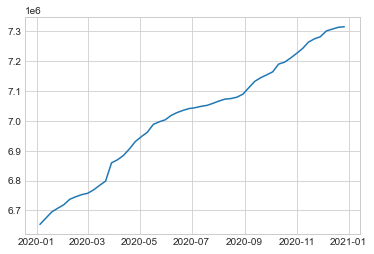

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(X, Y2);

<AxesSubplot:>

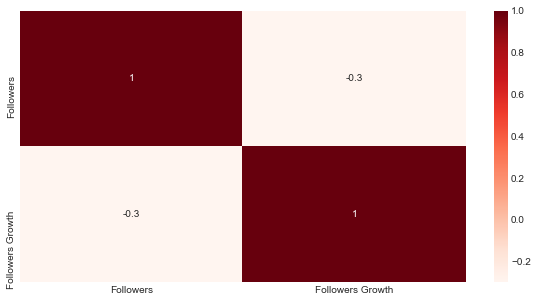

In [12]:
#Using Pearson Correlation
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,5))

cor = xx.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, ax =ax)

In [13]:
Nxx = cleaned_xx.copy()
date_time_colname = 'Beginning Of Interval'
#set index for time series
Nxx.set_index(date_time_colname, inplace = True)
Nxx.head(4)

,Followers,Followers Growth
Beginning Of Interval,,
2020-01-05,6653215,0.0058
2020-01-12,6674227,0.0032
2020-01-19,6695382,0.0032
2020-01-26,6707574,0.0018


In [67]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler

In [68]:
input_index_start = 1
target_index = 0
imputer = IterativeImputer(max_iter=10, random_state=0)
Nxx_vals = Nxx.iloc[:, input_index_start:].values
imputer.fit(Nxx_vals)
temp_x = imputer.transform(Nxx_vals);
Nxx.iloc[:, input_index_start:] = temp_x
Nxx.isnull().sum()

Followers           0
Followers Growth    0
dtype: int64

In [73]:
# multivariate multi-headed 1d cnn example
from numpy import array
from numpy import hstack
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate
from keras.layers import InputLayer, ConvLSTM2D, Reshape, GRU
from keras.layers.normalization import BatchNormalization 
    
    
target_location = 0
split_index = int( 0.7 * Nxx.shape[0]) # the index at which to split df into train and test

X_TRAIN = Nxx.values[:split_index, 1:]
X_TEST = Nxx.values[split_index:, 1:]
y_TRAIN = Nxx.values[:split_index, 0:1]
y_TEST = Nxx.values[split_index:, 0:1]

index_train = Nxx.index[:split_index]
index_test = Nxx.index[split_index:]
    
    

In [74]:
X_TRAIN.shape,y_TRAIN.shape,X_TEST.shape,y_TEST.shape

((36, 1), (36, 1), (16, 1), (16, 1))

In [75]:
#scalerX = StandardScaler(with_mean=True, with_std=True).fit(df.values[:,1:])
#df[df.columns[1:]] = scalerX.transform(df.values[:, 1:])
#scalery = StandardScaler(with_mean=True, with_std=True).fit(df.values[:,0:1])
#df[df.columns[0]]  = scalery.transform(df.values[:,0:1])

scalerX = StandardScaler(with_mean=True, with_std=True).fit(X_TRAIN)
X_TRAIN = scalerX.transform(X_TRAIN)
X_TEST = scalerX.transform(X_TEST)
scalary = StandardScaler(with_mean=True, with_std=True).fit(y_TRAIN)
y_TRAIN  = scalary.transform(y_TRAIN)
y_TEST  = scalary.transform(y_TEST)

In [110]:

    
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, 1:], sequences[end_ix-1, 0]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# split a multivariate sequence into samples
def split_sequences(_X, _y, n_steps):
    X, y = list(), list()
    for i in range(len(_X)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(_X):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = _X[i:end_ix, :], _y[end_ix-1, :]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

#dataset = df.values


# choose a number of time steps
n_steps_in = 1
n_steps_out = 1
n_features = 1

# convert into input/output
X_train, y_train = split_sequences(X_TRAIN, y_TRAIN, n_steps_in)
X_test, y_test = split_sequences(X_TEST, y_TEST, n_steps_in)

nColumns = 1



In [144]:
from keras.layers.advanced_activations import LeakyReLU, PReLU

# separate input data
X1 = X_train[:, 0].reshape(X_train.shape[0], n_features)

# first input model
visible1 = Input(shape=(n_steps_in, n_features))
cnn1 = Conv1D(filters=64, kernel_size=1, activation='relu')(visible1)
cnn1 = MaxPooling1D(pool_size=1)(cnn1)
cnn1 = Flatten()(cnn1)


# merge input models
merge = cnn1

#batchnorm = BatchNormalization()(merge)
#leakrelu = LeakyReLU() (batchnorm)



dense = Dense(50, activation='relu')(merge)
output = Dense(1)(dense)



model = Model(inputs=[visible1], outputs=output)





model.compile(optimizer='adam', loss='mse')

# fit model
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import TensorBoard
#%%time
print(len(X_train))
print(len(y_train))
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')


#history = model.fit(X_train, y_train, shuffle=True, epochs=300, 
#                     validation_split=0.2, verbose=1, batch_size=256)
#


history = model.fit(X_train, y_train, epochs=5000, verbose=0,batch_size=8) #, callbacks=[es, rlr, mcp, tb]
#





36
36


In [145]:
X_train.shape

(36, 1, 1)

In [146]:
model.summary()

Model: "model_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_67 (InputLayer)        (None, 1, 1)              0         
_________________________________________________________________
conv1d_67 (Conv1D)           (None, 1, 64)             128       
_________________________________________________________________
max_pooling1d_64 (MaxPooling (None, 1, 64)             0         
_________________________________________________________________
flatten_63 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_63 (Dense)             (None, 50)                3250      
_________________________________________________________________
dense_64 (Dense)             (None, 1)                 51        
Total params: 3,429
Trainable params: 3,429
Non-trainable params: 0
________________________________________________________

36/36 [==============================] - 0s 2ms/step

16/16 [==============================] - 0s 82us/step


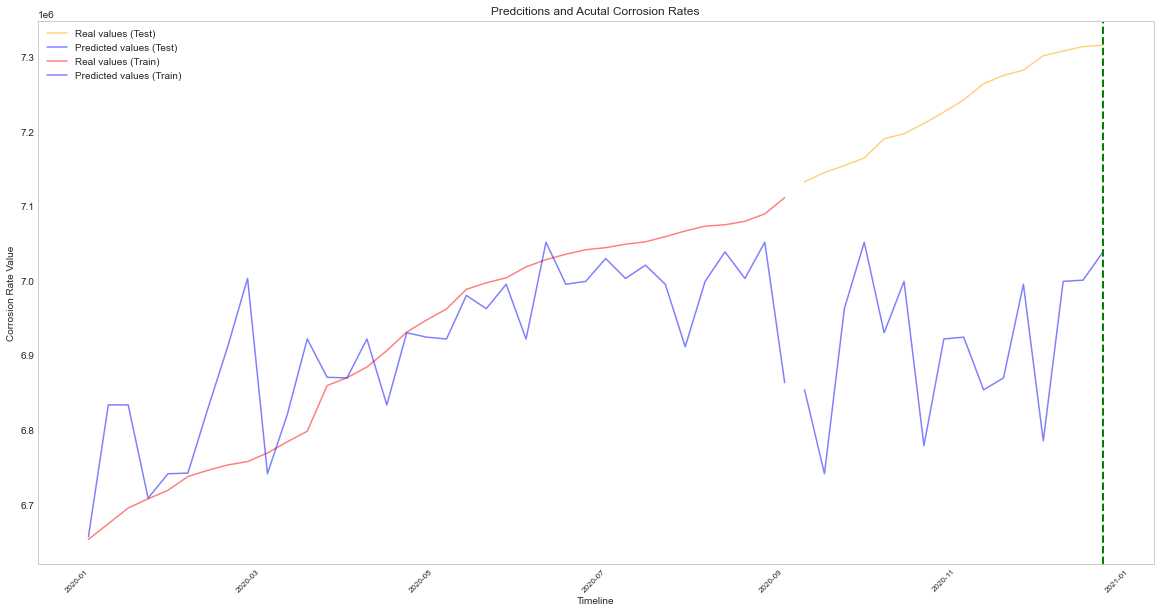

In [147]:
# training
y_pred_train = model.predict([X_train], verbose=1)
y_true_train = y_train


# demonstrate prediction
x_input = X_train[0]
x1 = x_input[:, 0].reshape((1, n_steps_in, n_features))


# convert into input/output
print()
# separate input data
X1_test = X_test[:, :, 0].reshape(X_test.shape[0], X_test.shape[1], n_features)

# training
y_pred_test = model.predict([X1_test], verbose=1)
y_true_test = y_test



alpha = 0.5
target = "Meas_Rate" 
plt.figure(figsize=(20,10))

plt.plot(index_test[n_steps_in-1:], scalary.inverse_transform(y_true_test),  color='orange', label='Real values (Test)',alpha=0.5)
plt.plot(index_test[n_steps_in-1:], scalary.inverse_transform(y_pred_test),  color='blue', label='Predicted values (Test)',alpha=0.5)


y_true_train = y_train.reshape(y_train.shape[0], 1)
plt.plot(index_train[n_steps_in-1:], scalary.inverse_transform(y_true_train),  color='red', label='Real values (Train)',alpha=0.5)
plt.plot(index_train[n_steps_in-1:], scalary.inverse_transform(y_pred_train),  color='blue', label='Predicted values (Train)',alpha=0.5)


plt.xlabel('datetime [-]', fontsize=14) #TODO: set x values as actual dates
plt.legend(loc='upper left', borderaxespad=0, frameon=False, fontsize=14, markerscale=3)

plt.title("Comparison", fontsize = 14)

plt.axvline(x = max(Nxx.index), color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title('Predcitions and Acutal Corrosion Rates', family='Arial', fontsize=12)
plt.xlabel('Timeline', family='Arial', fontsize=10)
plt.ylabel('Corrosion Rate Value', family='Arial', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
#plt.savefig('figures/CNN.jpg', dpi=300)
plt.show()